In [4]:
import pandas as pd
import numpy as np 

import boto3
import sagemaker.amazon.common as smac

In [25]:
# Download Data from S3 -- Simplest method

s3 = boto3.resource('s3')
bucket = s3.Bucket('sagemakerpractise') #Bucket
obj = bucket.Object('Salary_Data.csv') #File in the bucket or File path 

with open('filename', 'wb') as data:
    obj.download_fileobj(data)

In [26]:
sal_data = pd.read_csv('filename')

In [27]:
sal_data = pd.DataFrame(sal_data)

In [28]:
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Alternative method 

In [29]:
# Function to download data from S3

def download_from_s3(filename, bucket, key):
    with open(filename, 'wb') as f: #Write in Binary Mode
        return boto3.resource('s3').Bucket(bucket).Object(key).download_fileobj(f)

In [19]:
download_from_s3('Salary', 'sagemakerpractise', 'Salary_Data.csv')

In [36]:
salary = pd.read_csv('Salary')

In [38]:
import matplotlib.pyplot as plt

In [37]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
#Simple Linear Regression

In [3]:
salary = pd.read_csv('Salary')
# -1 indicates that the everything except last column is selected. In this dataset dependent variable is in the last column
# therefore -1 means you end up selecting all the independent varibles 
X = salary.iloc[:, :-1]
# Dependent varibale in this instance is placed in the column 1 (count in python starting at 0)
Y = salary.iloc[:, 1]

In [48]:
#Splitting the dataset into test set and training set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [56]:
#Fitting Simple Linear regreesion to training set

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
regressor = LinearRegression()

In [59]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
#Predicting Test set results

In [61]:
Y_pred = regressor.predict(X_test)

In [63]:
#Visualising the training set

Text(0,0.5,'Salary')

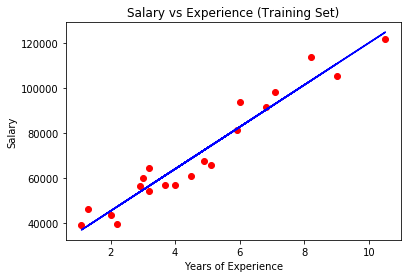

In [65]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [66]:
#Visualising the test set

Text(0,0.5,'Salary')

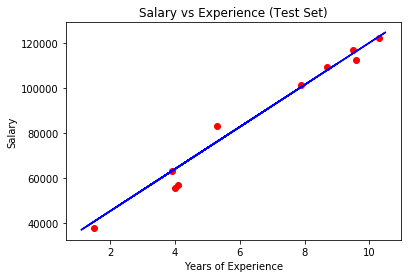

In [67]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')